In [28]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold

%matplotlib inline

In [29]:
# reading in train df

train = pd.read_csv('datasets/train.csv')

In [30]:
# reading in test df 

test = pd.read_csv('datasets/test.csv')

In [31]:
test.shape

(879, 80)

In [32]:
# Running .head() on my test df to make sure it weas read in correctly
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [33]:
# Running .info to get some additional info on the data. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [34]:
#Running .head() to get an overview of the structure of the data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [35]:
#Running .shape to check on my rows and columns
train.shape

(2051, 81)

In [36]:
#Running .describe to check numerical columns and get an idea of some of the values
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [37]:
#Running .isnull to check on null values and .sum() to quantify them
#Added .head() just to get some page real estate back
train.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
dtype: int64

In [38]:
# Running .dtypes to get an overview of the datatypes we'll be working with.

#Added .head() just to get some page real estate back

train.dtypes.head()

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
dtype: object

In [39]:
# Creating a correlation variable for the SalePrice column in relation to the rest of the df

corr = train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

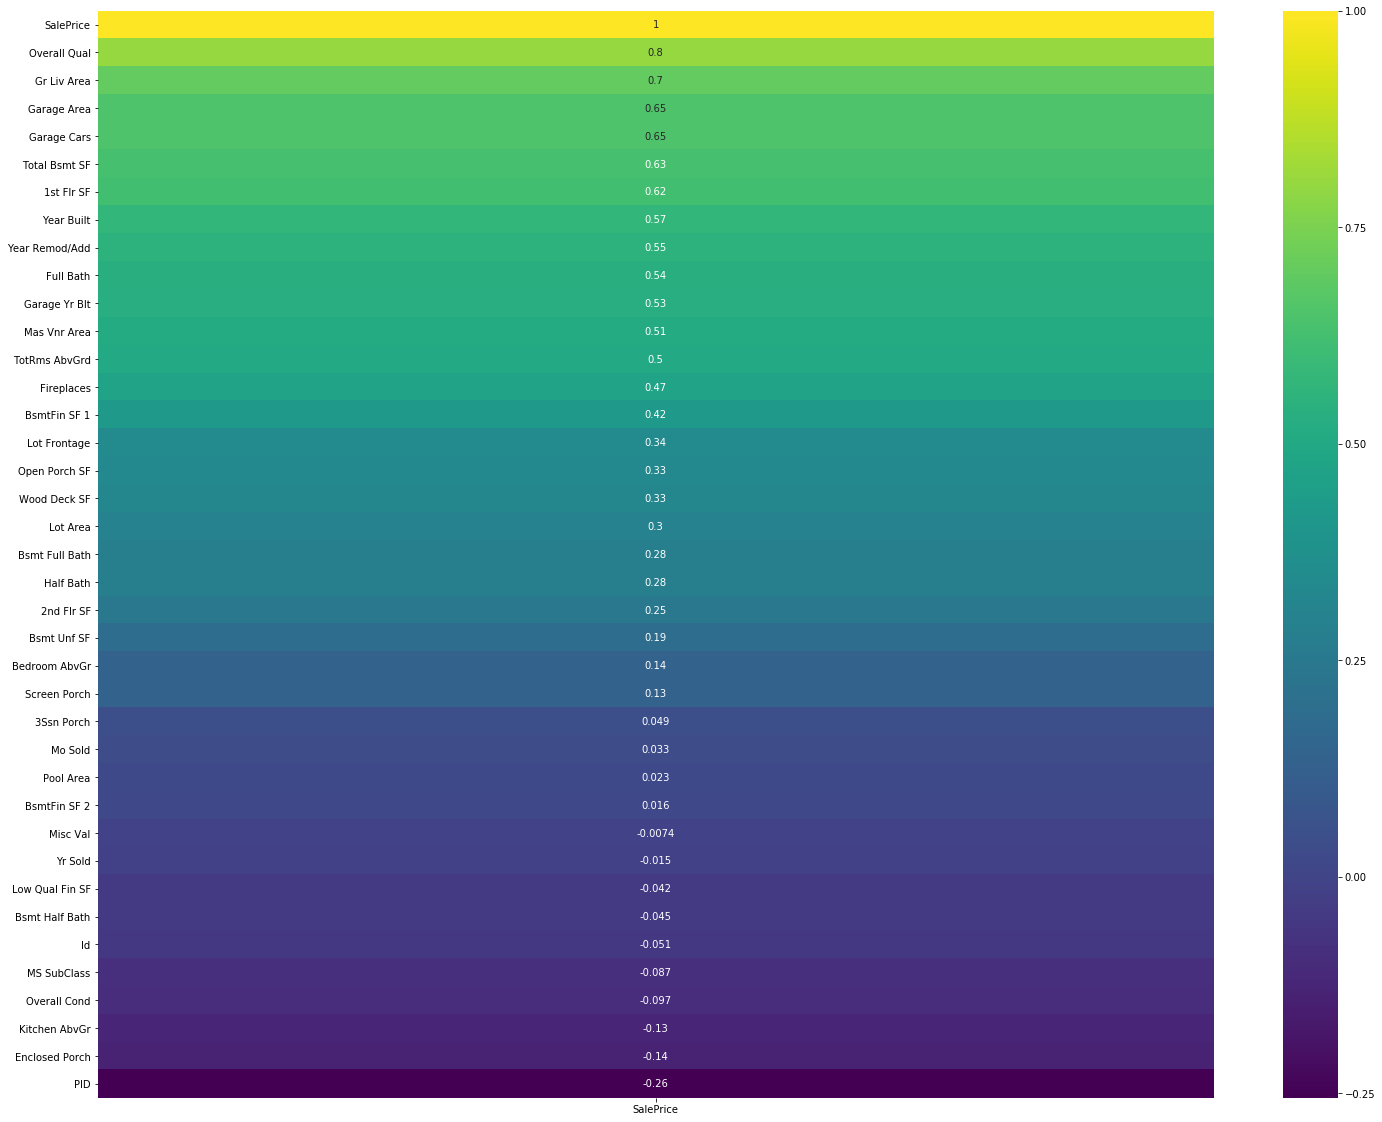

In [40]:
#Creating a heatmap to visualize the correlation 
# color = sns.palplot(sns.cplt.figure(figsize=(25,20))
sns.heatmap(corr, 
            annot = True, 
            cmap = 'viridis',
            );olor_palette("OrRd", 10))


In [41]:
# Checking a list of possible features for null values

sample = train[['Overall Qual', 
                'Gr Liv Area', 
                'Garage Cars', 
                '1st Flr SF', 
                'Year Built',
                'SalePrice']]

In [42]:
heat = pd.DataFrame(sample)

In [43]:
corr_h = heat.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

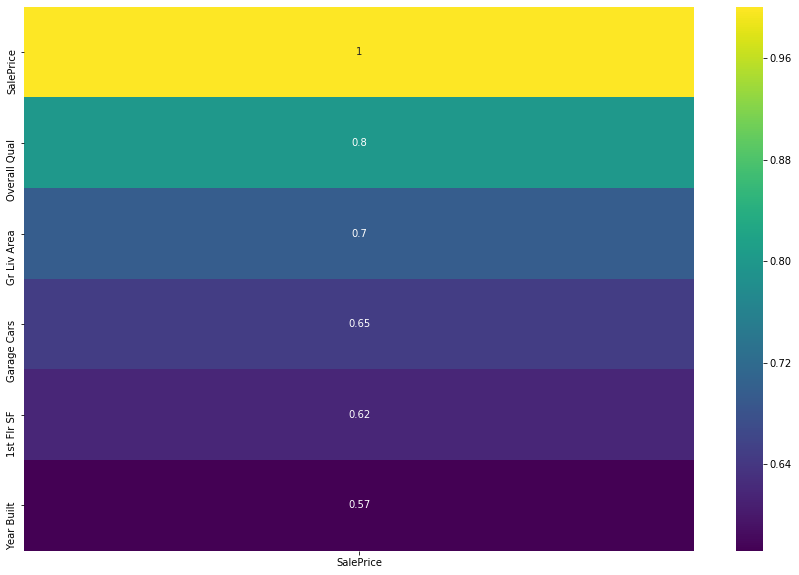

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_h, 
            annot = True, 
            cmap = 'viridis',
            );

In [45]:
#Dropping null values for column 'Garage Cars'
train = train.dropna(subset=['Garage Cars'])
test = test.dropna(subset=['Garage Cars'])

In [46]:
# Re-running isnull().sum() to see if null values have been removes

train[['Garage Cars']].isnull().sum()

Garage Cars    0
dtype: int64

In [47]:
# Checking whole list again to make sure null values are removed
train[['Overall Qual', 
       'Gr Liv Area', 
       'Garage Cars', 
       '1st Flr SF', 
       'Year Built']].isnull().sum()

Overall Qual    0
Gr Liv Area     0
Garage Cars     0
1st Flr SF      0
Year Built      0
dtype: int64

In [48]:
# Checking shape of df to make sure row has been removed
train.shape

(2050, 81)

In [49]:
# Checking data types of my desired features
train[['Overall Qual', 'Gr Liv Area', 'Garage Cars', '1st Flr SF', 'Year Built']].dtypes

Overall Qual      int64
Gr Liv Area       int64
Garage Cars     float64
1st Flr SF        int64
Year Built        int64
dtype: object

In [50]:
#Converting 'Garage Cars' to an int
train['Garage Cars'] = train['Garage Cars'].astype(int, inplace=True)
test['Garage Cars'] = test['Garage Cars'].astype(int, inplace=True)

In [51]:
#Re-checking desired features to see if change was made
train[['Overall Qual', 'Gr Liv Area', 'Garage Cars', '1st Flr SF', 'Year Built']].dtypes

Overall Qual    int64
Gr Liv Area     int64
Garage Cars     int64
1st Flr SF      int64
Year Built      int64
dtype: object

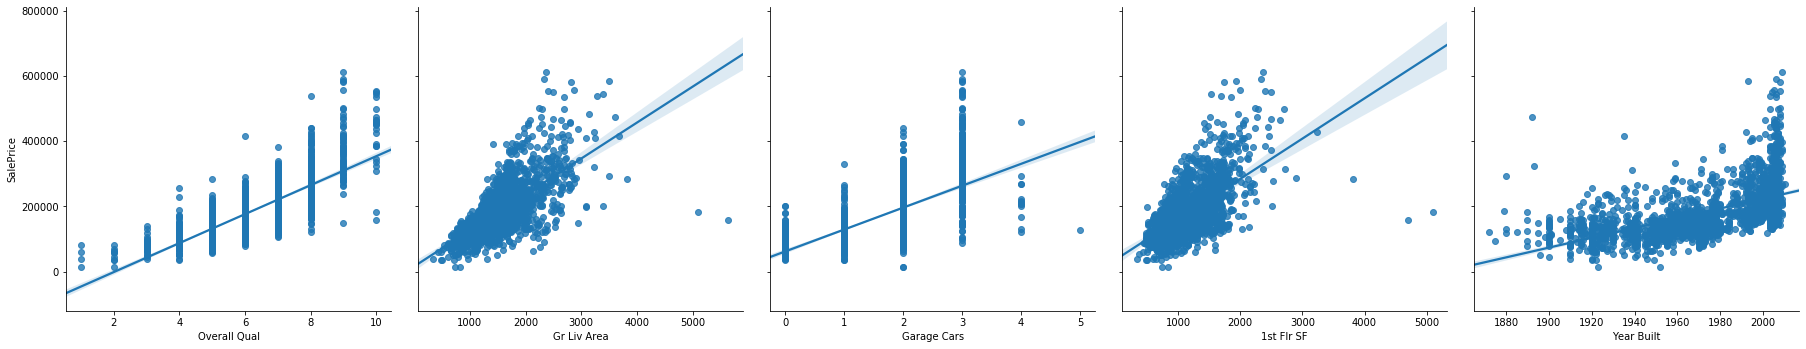

In [91]:
#Creating a pairplot with regression line for more visual aid
sns.pairplot(train, 
             x_vars=['Overall Qual',
                            'Gr Liv Area', 
                            'Garage Cars', 
                            '1st Flr SF', 
                            'Year Built'],
             y_vars=['SalePrice'],
             kind='reg',
             height=5,
             aspect=1);

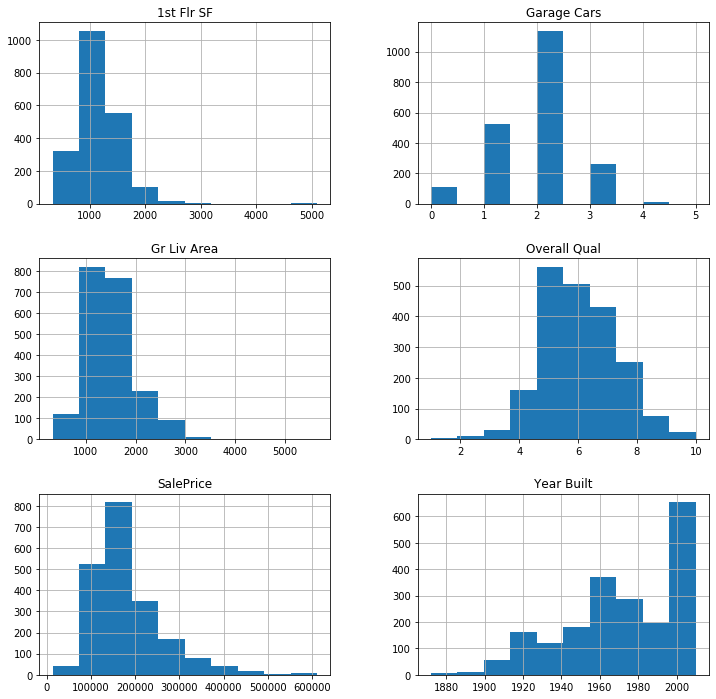

In [53]:
#Creating histograms for more visual aid
train.hist(figsize=(12, 12), column=['Overall Qual',
                            'Gr Liv Area', 
                            'Garage Cars', 
                            '1st Flr SF', 
                            'Year Built',
                            'SalePrice']);

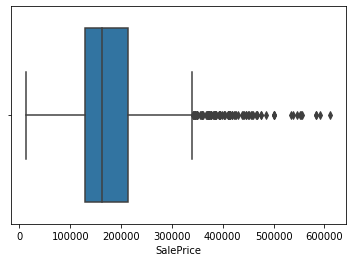

In [54]:
# Creating a boxplot for the target variable to get an idea of the distribution
sns.boxplot(train.SalePrice);

In [55]:
# Creating a features variable for the columns I want in my model
features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', '1st Flr SF', 'Year Built']


# Assigning my X and y

X_train = train[features]
y_train = train['SalePrice']
X_test = test[features]

In [56]:
#Using power transformation to normalize my target variable
y_train_pt = y_train.map(np.log)

In [57]:
# Preping our model by scaling the data
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [58]:
# Instantiating models
lr = LinearRegression()
lasso = LassoCV(cv=5)
ridge = RidgeCV()

In [59]:
#Using cross_val_score to evaluate Linear Regression Model
cross_val_score(lr, X_train_sc, y_train_pt, cv=5).mean()


0.8079037764593402

In [60]:
#Using cross_val_score to evaluate Lasso Model
cross_val_score(lasso, X_train_sc, y_train_pt, cv=5).mean()

0.8079266160683586

In [61]:
#Using cross_val_score to evaluate ridge model
cross_val_score(ridge, X_train_sc, y_train_pt, cv=5).mean()

0.8079526054361386

In [62]:
#Moving forward with lasso since it had the best score
#fitting model
ridge.fit(X_train_sc, y_train_pt);

In [63]:
#Comparing different scores, starting with CV
cross_val_score(ridge, X_train_sc, y_train_pt, cv=5).mean()

0.8079526054361386

In [64]:
#Training score
ridge.score(X_train_sc, y_train_pt)

0.811288962803072

In [65]:
# Creating predictions
pred = ridge.predict(X_test_sc)
pred_transformed = np.exp(pred)

pred_df = pd.DataFrame(pred_transformed)

In [66]:
# Creating a dataframe for the test['id'] columns
id_df = pd.DataFrame(test[['Id']])

In [67]:
# Creating a new data frame where I merged predictions and id for submission
df = id_df.join(pred_df)

In [69]:
# Appropriately renaming columns for submission
df.rename(columns={0: 'SalePrice'}, inplace=True)

In [70]:
# Calling df.head to make sure the join and rename worked
df.head()

,Id,SalePrice
0,2658,140406.862422
1,2718,185637.746682
2,2414,192142.599943
3,1989,113570.275974
4,625,164972.182775


In [78]:
#Exporting to CSV
df.to_csv('./datasets/submission2.csv')